In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
transaction_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/shared/homeworks/python_ds_miniprojects/5/transaction_data.csv')

In [4]:
transaction_data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [5]:
transaction_data.shape

(5315, 3)

In [7]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [6]:
transaction_data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [9]:
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [19]:
transaction_data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [16]:
transaction_count = transaction_data.groupby('transaction', as_index=False).agg({'date':'count'})
transaction_count

,transaction,date
0,cancelled,1619
1,error,4
2,successfull,3692


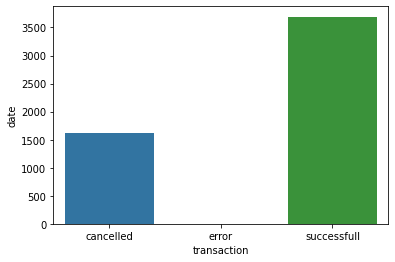

In [21]:
graph1 = sns.barplot(data=transaction_count, x='transaction', y='date')

In [28]:
successful_by_name = transaction_data.query("transaction == 'successfull'").groupby('name', as_index=False).agg({'date':'count'})
successful_by_name

,name,date
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68
5,Ekaterina_Polyanova,68
6,Ekaterina_Smirnova,77
7,Irina_Fedorova,62
8,Irina_Ivanova,60
9,Irina_Lesnova,76


In [31]:
successful_by_name.describe()

,date
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


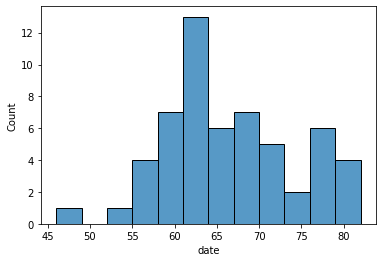

In [30]:
graph2 = sns.histplot(data=successful_by_name, x='date', binwidth=3)
# по оси х – число транзакций 
# по оси y – доля пользователей с таким числом транзакций

In [111]:
transaction_data_updated = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/personal/csv_files/transaction_data_updated.csv')

In [112]:
transaction_data_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [113]:
user_vs_minute_pivot = transaction_data_updated.groupby(['minute', 'name'], as_index=False).agg({'date':'count'}).pivot(index='minute', columns='name', values='date').fillna(0)

In [114]:
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


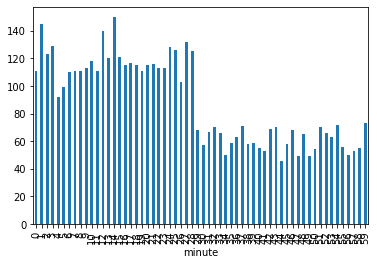

In [115]:
user_vs_minute_pivot.sum(axis=1).plot(kind='bar')

In [116]:
transaction_data_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [117]:
transaction_data_updated.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [118]:
transaction_data_updated['date'] = pd.to_datetime(transaction_data_updated['date'])

In [119]:
transaction_data_updated.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [120]:
transaction_data_updated['true_minute'] = transaction_data_updated.date.dt.minute + transaction_data_updated.date.dt.hour * 60

In [121]:
transaction_data_updated.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
